In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
admitdata = pd.read_csv(r"C:\Users\SHRISTI\Desktop\Machine Learning\Decibels\Data Sets\Admission_Prediction.csv")
admitdata

,Serial_No,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Result
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [58]:
admitdata.head()

,Serial_No,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Result
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Total number of features = 9
    output feature = Result
    feature 'Serial_no' is of least importance
    Total input features = 7

In [59]:
admitdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial_No            500 non-null int64
GRE                  500 non-null int64
TOEFL                500 non-null int64
University_Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Result               500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


NO null entries present in any of the features.
    Different datatypes involved are Float and the integer.
    No. of float values = 4.
    no. of integer values = 5.

In [60]:
admitdata.describe()

,Serial_No,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Result
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [61]:
corr_matrix = admitdata.corr()
corr_matrix["Result"].sort_values(ascending=False)

Result               1.000000
CGPA                 0.882413
GRE                  0.810351
TOEFL                0.792228
University_Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Serial_No            0.008505
Name: Result, dtype: float64

The correlation matrix of the feature "Result" shows that the serial_no is of less related to the output feature and thus can be dropped and the remaining features can be analyzed. 

In [62]:
ad = admitdata.drop(['Serial_No'],axis=1)
ad

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Result
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


Since the serial_no is less related to the output feature drop the coloumn containing the serial_no.

In [113]:
ad.corr()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Result
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Result,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [63]:
ad.shape

(500, 8)

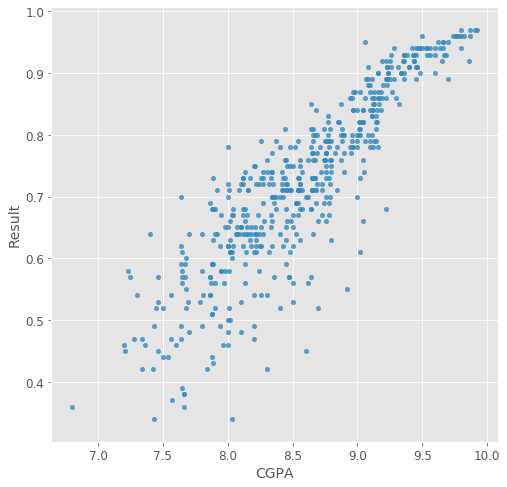

In [64]:
ad.plot(kind='scatter',x='CGPA',y='Result',alpha=0.8,figsize=(8,8))

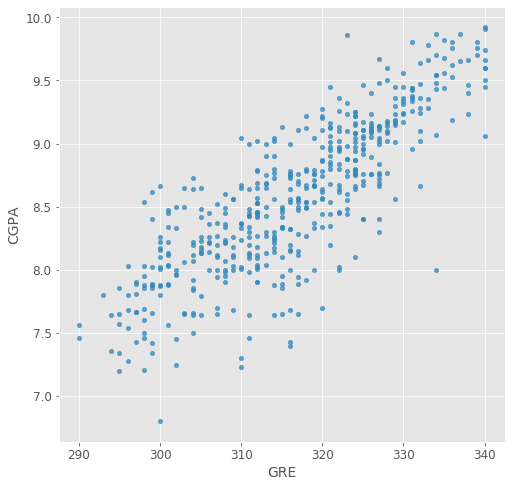

In [110]:
ad.plot(kind='scatter',x='GRE',y='CGPA',alpha=0.8,figsize=(8,8))

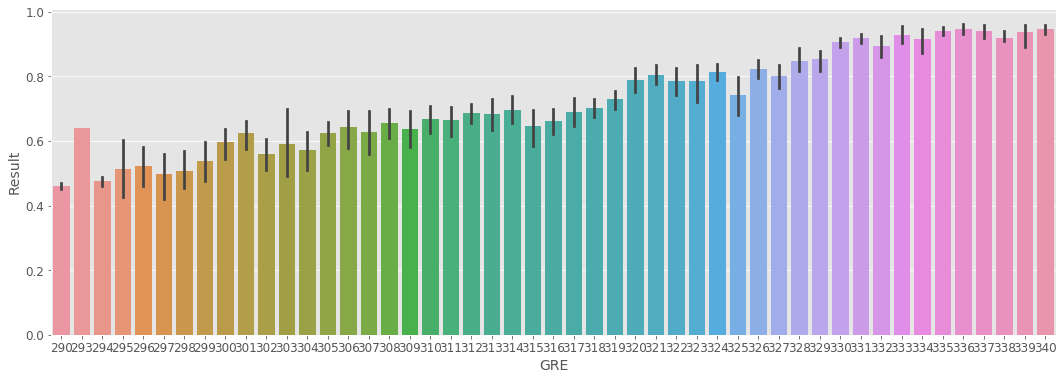

In [65]:
plt.figure(figsize=(18,6))
sns.barplot(x='GRE',y='Result',data=admitdata)
plt.show();

In [95]:
X = ad.iloc[:, [0,2,5]].values
y = (ad.iloc[:,7]>=0.5).astype(np.int)

In [96]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_pred = log_reg.predict(X)    

In [98]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y, y_pred)
cnf_matrix

array([[  2,  35],
       [  5, 458]], dtype=int64)

In [99]:
result = confusion_matrix(y, y_pred)

print("True Negative : " + str(result[0,0]))
print("False Negative: " + str(result[1,0]))
print("False Positive: " + str(result[0,1]))
print("True Positive : " + str(result[1,1]))

True Negative : 2
False Negative: 5
False Positive: 35
True Positive : 458


In [100]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy after CV :", accuracy_score(y, y_pred))
print("Pricision after CV:", precision_score(y, y_pred,average='weighted'))
print("Recall after CV   :", recall_score(y, y_pred,average='weighted'))
print("f1_score after CV :", f1_score(y, y_pred,average='weighted'))

Accuracy after CV : 0.92
Pricision after CV: 0.8814024920312953
Recall after CV   : 0.92
f1_score after CV : 0.8939825028527957


In [101]:
from sklearn.metrics import roc_curve

y_scores = log_reg.predict_proba(X)[::,1]

fpr, tpr, thresholds = roc_curve(y, y_scores)

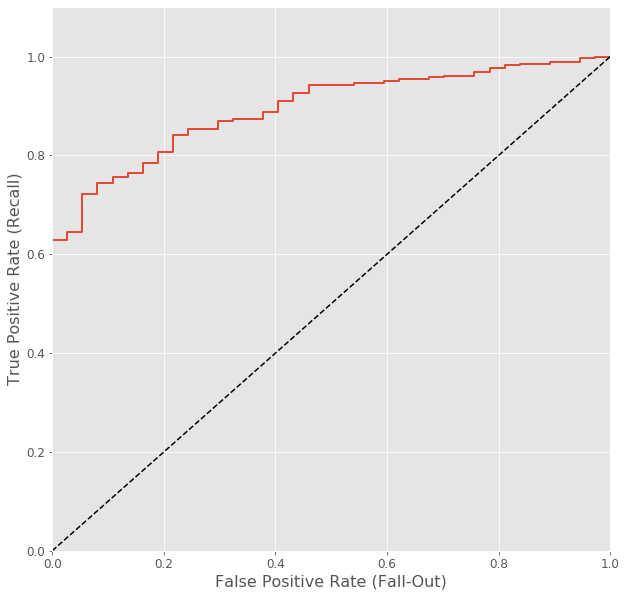

In [106]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([-0, 1, 0, 1.1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(10, 10))                         
plot_roc_curve(fpr, tpr)
plt.show()

In [107]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, y_scores)

0.8939933453972331

In [108]:
log_reg.predict([[331,118,9.65]])

array([1])

In [109]:
log_reg.predict_proba([[331,118,9.65]])

array([[0., 1.]])